## Candyland Simulation
- Simulate candy land games and display graphical output
    - Percentage of games completed before deck running out
    - Length of games by number of cards drawn

- Board Setup
    - There are 126 colored spaces following a repeated six-color pattern of (red, purple, yellow, blue, orange, green) plus an extra red space at the end.
    - There are two shortcuts(5-->59 and 34--47)
    - Three spaces make you lose your turn (48, 86, 121). This means the other player gets to go twice in a row.
    - There are six special character spaces (total of 133 board spaces).
    - Character locations are as follows: Plumpy: 9, Mr. Mint: 18, Mr. Gumdrop: 43, Nana Nutbread: 75, Princess Lolly: 96, Queen Frostine: 104
    - There are 72 cards in the deck - 1 for each of the six characters, 9 singles and 2 doubles for each color
    - Modified rules (per my son) is that players may be on the same space
<img style="float: left" src="https://vignette.wikia.nocookie.net/candy-land/images/3/39/Candyland_Game_Board.jpg/revision/latest?cb=20130615165758&format=original" width="700"/>

In [1]:
import random

CARD_COLORS = ["r", "p", "y", "b", "o", "g"]
CARD_TYPES = ["s"]*9 + ["d"]*2
SPECIAL_CARDS = ["plumpy", "mint", "gumdrop", "nutbread", "lolly", "frostine"]

def shuffle_deck():
    DECK = [(color, single_double) for color in CARD_COLORS for single_double in CARD_TYPES]\
    + [(special, "s") for special in SPECIAL_CARDS]
    random.shuffle(DECK)
    return DECK

In [2]:
def generate_board():
    b = CARD_COLORS * 21
    b += "r"

    special_items = ["plumpy", "mint", "gumdrop", "nutbread", "lolly", "frostine", "rpybog", "rpybog"]
    special_locations = [8, 17, 42, 75, 96, 104, 133, 134]

    for i in range(8):
        b.insert(special_locations[i], special_items[i])

    d = {}
    i = 0
    for x in b:
        i += 1
        d[i] = x

    return d

BOARD = generate_board()

In [3]:
class Player():
    def __init__(self):
        self.board_space = 0
        self.win = False
        self.skip_turn = False
    
    def move(self):
        for i in BOARD.items():
            if i[0] > self.board_space and self.draw[0] in i[1]:
                return i[0]

    def play_card(self, DECK):
        self.draw = DECK.pop()
        
        # Color Card Draw
        if len(self.draw[0]) == 1:
            self.board_space = self.move()
            if self.draw[1] == "d":
                self.board_space = self.move()

        # Special Card Draw
        else:
            for i in BOARD.items():
                if i[1] == self.draw[0]:
                    self.board_space = i[0]
                    break
        
        if self.board_space == 134 or self.board_space == 135:
            self.win = True
        elif self.board_space == 48 or self.board_space == 86 or self.board_space == 121:
            self.skip_turn = True
        elif self.board_space == 5:
            self.board_space = 59
        elif self.board_space == 34:
            self.board_space = 47

        return DECK

In [4]:
def play_2p(loops):
    game_len_list = []
    run_out_counter = 0
    for _ in range(loops):
        p1 = Player()
        p2 = Player()
        DECK = shuffle_deck()
        
        while True:
            if DECK == []:
                run_out_counter += 1
                break

            if not p1.skip_turn:
                DECK = p1.play_card(DECK)
                if p1.win:
                    game_len_list += [72-len(DECK)]
                    break
            else:
                p1.skip_turn = False
                

            if DECK == []:
                run_out_counter += 1
                break
                
            if not p2.skip_turn:
                DECK = p2.play_card(DECK)
                if p2.win:
                    game_len_list += [72-len(DECK)]
                    break
            else:
                p2.skip_turn = False

    return [run_out_counter, game_len_list]

In [5]:
import matplotlib.pyplot as plt
import statistics

def stats(x, n, players, bins):
    all_drawn = x[0]
    game_lens = x[1]

    plt.hist(game_lens, bins=bins)
    plt.ylabel("Frequency")
    plt.xlabel("Total Card Plays")
    plt.xticks([x for x in range(0, 80, 5)])
    plt.title("{0} Games of Candyland ({1} Players)".format(n, players))

    plt.show()

    print("Maximum plays: {0}\nMinimum: {1}\nAverage: {2}\nMedian: {3}\nStandard Deviation: {4}"
          .format(max(game_lens), min(game_lens), statistics.mean(game_lens), statistics.median(game_lens), statistics.stdev(game_lens)))
    
    
    labels = "Game Completed", "Out of Cards"
    sizes = [n-all_drawn, all_drawn]

    plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)

    plt.axis('equal')
    plt.show()

    print("In {0} games out of {1} ({2}%) all cards were drawn. ({3} Players)".format(all_drawn, n, (all_drawn/n)*100, players))

In [8]:
n = 100000
x = play_2p(n)

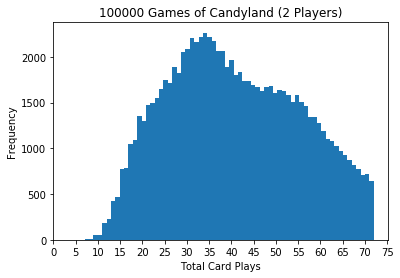

Maximum plays: 72
Minimum: 7
Average: 40.82438292007933
Median: 40
Standard Deviation: 14.975854096335418


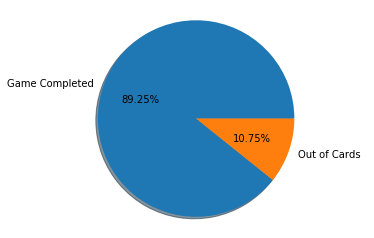

In 10749 games out of 100000 (10.749%) all cards were drawn. (2 Players)


In [9]:
stats(x, n, 2, 66)